<ipython-input-70-134c1eb25dfc>:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X[:,:,0],Z[:,:,0],np.log10(Rho[:,:,0]),cmap="Purples",vmax = 0,vmin=-6,zorder = 1)


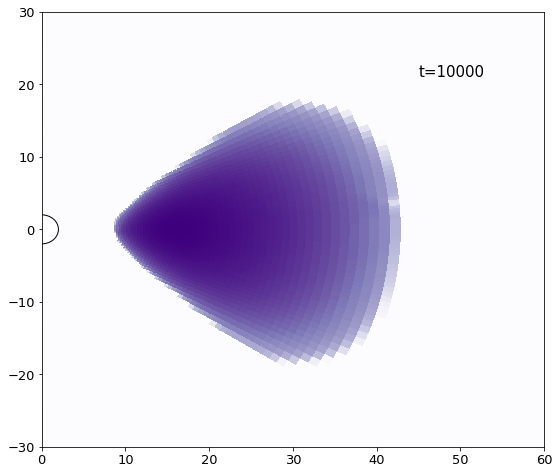

In [70]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py as hdf
import math

def fig_mag(path,dumpNO,text,lincnt,barva,see):
    global fig, l, Energy , Rho
    
    f=hdf.File(path+"dump"+dumpNO+".h5","r")
    f2=hdf.File(path+"coords.h5","r")
    
    N1 = f2['N1'][()]
    N2 = f2['N2'][()]
    a  = f2['a'][()] 
    dx1 = f2['dx1'][()]
    dx2 = f2['dx2'][()]
    r = f2['r'][()]
    th = f2['th'][()]
    ph = f2['ph'][()]
    ucov = f['ucov'][()]

    Rho = f['Rho'][()]
    t = f['t'][()]
    B1B2B3gdet = f['B1B2B3gdet'][()]
    Energy = f['Energy'][()] 
    Emax = np.amax(Energy[:,:,0])
    #Emax = max(abs(np.amin(Energy)),abs(np.amax(Energy)))
    l = -ucov[:,:,:,3]/(ucov[:,:,:,0])
    lmax = max(abs(np.amin(l)),abs(np.amax(l))) # just to keep l = 0 white
    
    
    Th = np.pi*(th[:,:,:])
    Ph = np.pi*(ph[:,:,:])
    X = r[:,:,:]*np.sin(th[:,:,:])*np.cos(ph[:,:,:])   #radian
    Z = r[:,:,:]*np.cos(th[:,:,:])   #radian
    
    

    #plt.figure()
    plt.figure(figsize=(9,8))
    plt.rcParams.update({'font.size': 13})
    plt.rcParams['pcolor.shading']
    plt.tight_layout()
    
    #see=90
    plt.axis([0, see, -0.5*see, 0.5*see])
    #plt.ylabel('z[M]') 
    #plt.xlabel('X[M]')

    # mass density distribution
    plt.pcolormesh(X[:,:,0],Z[:,:,0],np.log10(Rho[:,:,0]),cmap="Purples",vmax = 0,vmin=-6,zorder = 1)
    
    #mass and angular momentum
    #plt.pcolormesh(X[:,:,0],Z[:,:,0],np.log10(Rho[:,:,0])*np.sign(l[:,:,0]),cmap="seismic",vmax = 6,vmin=-6,zorder = 1)
    
    #angular momentum distribution
    #plt.pcolormesh(X[:,:,0],Z[:,:,0],l[:,:,0], cmap="seismic", vmin=-lmax, vmax = lmax)
    
    #energy
    #plt.pcolormesh(X[:,:,0],Z[:,:,0],np.log10(Energy[:,:,0]),cmap="gist_heat",vmax = -3,vmin=-8,zorder = 1)
    
    #plt.colorbar()
    
 
    
    # magnetic field lines
    BB = B1B2B3gdet[:,:,:,0]
    daphi = -BB[:,:,0]*dx2
    aphi=daphi[:,::-1].cumsum(axis=1)[:,::-1]
    contour_levels = np.linspace(aphi.min(),aphi.max(),lincnt)[1:-1]
    #plt.contour(X[:,:,0],Z[:,:,0], aphi, levels=contour_levels, linestyles="solid", colors="black", linewidths=0.4)

    #plt.text(0.75*see, 0.35*see, text+"\n"+"t="+str(int(t)).zfill(5)+"\n"+"$\u03B2 =1000$", color=barva, size=15) # info text
    plt.text(0.75*see, 0.35*see, text+"\n"+"t="+str(int(t)).zfill(5), color=barva, size=15)
    hor = (1. + np.sqrt(1. - a*a)) # BH horizon
    bhhor=plt.Circle((0,0),hor, edgecolor='black', facecolor='None') # BH horizon
    plt.gcf().gca().add_artist(bhhor) # BH horizon
    
    #savePic
    
    plt.savefig(dumpNO+".png")

    
    #fig = plt.gcf()
    fig=plt.draw()

    #imgdata = StringIO.StringIO()
    
    return(plt.draw()) 


fig_mag("/media/bardiev/Disk/codes/ForDiplom/nomag/exe/dumps/","1000","",20,"black",60)

In [19]:
#for saving pictures

#for i in range(800,1000):
    if 0<i<10: 
         fig_mag("/media/bardiev/Disk/codes/ForDiplom/One//beta1000/exe/dumps/","00"+str(i),"contour",20,"black",60)
                
    if 10<i<100:
        fig_mag("/media/bardiev/Disk/codes/ForDiplom/One//beta1000/exe/dumps/","0"+str(i),"contour",20,"black",60)
        
    if i>100 :
         fig_mag("/media/bardiev/Disk/codes/ForDiplom/One//beta1000/exe/dumps/",""+str(i),"contour",20,"black",60)


IndentationError: unexpected indent (<ipython-input-19-cb54c9595cb1>, line 4)

In [5]:
path="/media/bardiev/Disk/codes/FM//harm/dumps/two/coo/samesize/exe/dumps/"
dumpNO="096"
f=hdf.File(path+"dump"+dumpNO+".h5")
f2=hdf.File(path+"coords.h5")
print(list(f))
print(list(f2))

['B1B2B3gdet', 'DivB', 'Energy', 'Rho', 'U1U2U3gdet', 'bcon', 'bcov', 'dt', 'dump_cnt', 'failed', 'image_cnt', 'nstep', 'rdump_cnt', 't', 'ucon', 'ucov']
['DTd', 'DTi', 'DTl', 'DTr', 'N1', 'N2', 'N3', 'R0', 'Rin', 'Rout', 'X1', 'X2', 'X3', 'a', 'cour', 'dx1', 'dx2', 'dx3', 'dxpdx', 'gam', 'gcon', 'gcov', 'gdet', 'hslope', 'lim', 'ph', 'ph_1D', 'r', 'r_1D', 'startx1', 'startx2', 'startx3', 'tf', 'th', 'th_1D', 'x', 'y', 'z']


<ipython-input-5-77802b98d39d>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f=hdf.File(path+"dump"+dumpNO+".h5")
<ipython-input-5-77802b98d39d>:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f2=hdf.File(path+"coords.h5")


<ipython-input-79-1ece07367727>:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f=hdf.File(path+"dump"+dumpNO+".h5")
<ipython-input-79-1ece07367727>:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f2=hdf.File(path+"coords.h5")
<ipython-input-79-1ece07367727>:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either 

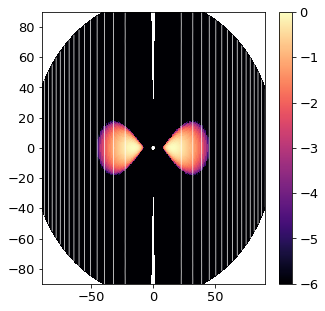

In [79]:
def read_dump(path,dumpNO):
    global B1B2B3gdet,Rho,X,Z,a,dx2
    
    f=hdf.File(path+"dump"+dumpNO+".h5")
    f2=hdf.File(path+"coords.h5")
    
    N1 = f2['N1'][()]
    N2 = f2['N2'][()]
    a  = f2['a'][()] 
    dx2 = f2['dx2'][()]
    r = f2['r'][()]
    th = f2['th'][()]
    ph = f2['ph'][()]

    Rho = f['Rho'][()]
    t = f['t'][()]
    B1B2B3gdet = f['B1B2B3gdet'][()]

    Th = np.pi*(th[:,:,:])
    Ph = np.pi*(ph[:,:,:])
    X = r[:,:,:]*np.sin(th[:,:,:])*np.cos(ph[:,:,:])   #radian
    Z = r[:,:,:]*np.cos(th[:,:,:])   #radian

    return() 


def fig_XXX(path,dumpNO1,dumpNO2,text,lincnt,barva,see):
    
    #plt.figure()
    plt.figure(figsize=(5,5))
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    
    #plt.gcf().set_facecolor("red")
    
    #see=41
    plt.axis([-see, see, -see, see])
    #plt.ylabel('z[M]') 
    #plt.xlabel('X[M]')

    # mass density distribution
    #cmap="jet"
    
    
    read_dump(path,dumpNO1)
    
    BB = B1B2B3gdet[:,:,:,0]
    daphi = -BB[:,:,0]*dx2
    aphi=daphi[:,::-1].cumsum(axis=1)[:,::-1]
    contour_levels = np.linspace(aphi.min(),aphi.max(),lincnt)[1:-1]
    
    plt.pcolormesh(X[:,:,0],Z[:,:,0],np.log10(Rho[:,:,0]),cmap="magma",vmax = 0,vmin=-6,zorder = 1)
    plt.contour(X[:,:,0],Z[:,:,0], aphi, levels=contour_levels, linestyles="solid", colors="white", linewidths=0.7)
    
    
    hor = (1. + np.sqrt(1. - a*a)) # BH horizon
    bhhor=plt.Circle((0,0),hor, edgecolor='black', facecolor='None') # BH horizon
    plt.gcf().gca().add_artist(bhhor) # BH horizon
    
    #fig = plt.gcf()
    fig=plt.draw()
    # nipy_spectral
    # jet
    
    read_dump(path,dumpNO2)
    
    BB = B1B2B3gdet[:,:,:,0]
    daphi = -BB[:,:,0]*dx2
    aphi=daphi[:,::-1].cumsum(axis=1)[:,::-1]
    contour_levels = np.linspace(aphi.min(),aphi.max(),lincnt)[1:-1]
    
    plt.pcolormesh(-X[:,:,0],Z[:,:,0],np.log10(Rho[:,:,0]),cmap="magma",vmax = 0,vmin=-6,zorder = 1)
    plt.colorbar()
    plt.contour(-X[:,:,0],Z[:,:,0], aphi, levels=contour_levels, linestyles="solid", colors="white", linewidths=0.7)
    
    
    hor = (1. + np.sqrt(1. - a*a)) # BH horizon
    bhhor=plt.Circle((0,0),hor, edgecolor='black', facecolor='None') # BH horizon
    plt.gcf().gca().add_artist(bhhor) # BH horizon
    
    #fig = plt.gcf()
    fig=plt.draw()

    #imgdata = StringIO.StringIO()
    
    return(plt.draw()) 


fig_XXX("/media/bardiev/Disk/codes/FM/dumps/one/a0/exe/dumps/","000","000","contour",20,"black",90)

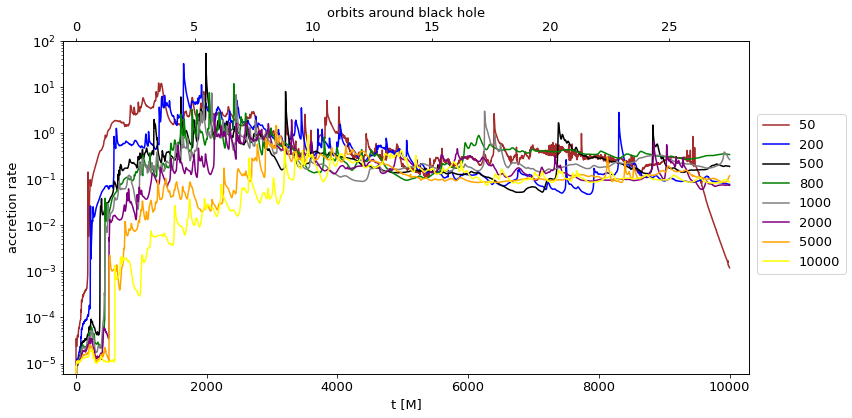

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py as hdf
import math
def load_enerX(fname,pos):
     global t,dm

     data = np.loadtxt(fname)

     t = data[:,0]
     dm = data[:,pos] # 4-old 6-new

     return()


fig, ax1 = plt.subplots(1,1)
ax1.axis([-200, 10300, 6*1e-6, 100])
ax1.set_xlabel('t [M]')
ax1.set_ylabel('accretion rate')

cesta="/media/bardiev/Disk/codes/ForDiplom/AcRates/";
misto=6 # or 7 ?

load_enerX(cesta+"50.out",misto); t0=t; dm0=dm
#load_enerX(cesta+"100.out",misto); t1=t; dm1=dm
load_enerX(cesta+"200.out",misto); t2=t; dm2=dm
load_enerX(cesta+"500.out",misto); t3=t; dm3=dm
load_enerX(cesta+"800.out",misto); t4=t; dm4=dm
load_enerX(cesta+"1000.out",misto); t5=t; dm5=dm
load_enerX(cesta+"2000.out",misto); t6=t; dm6=dm
load_enerX(cesta+"5000.out",misto); t7=t; dm7=dm
load_enerX(cesta+"10k.out",misto); t8=t; dm8=dm


ax1.semilogy(t0, -dm0, 'brown',    label= '50')
#ax1.semilogy(t1, -dm1, 'red',    label= '100')
ax1.semilogy(t2, -dm2, 'blue',  label='200')
ax1.semilogy(t3, -dm3, 'black',  label='500')
ax1.semilogy(t4, -dm4, 'green',    label='800')
ax1.semilogy(t5, -dm5, 'gray',    label='1000')
ax1.semilogy(t6, -dm6, 'purple',    label='2000')
ax1.semilogy(t7, -dm7, 'orange',    label='5000')
ax1.semilogy(t8, -dm8, 'yellow',    label='10000')

ax2 = ax1.twiny()
ax2.set_xlabel('orbits around black hole')
ax1.legend(loc='upper right', bbox_to_anchor=(1.15, 0.8))
orbit=363 # Schw r=16  #orbit=234; # r=12 an spin
hodnoty = ax1.get_xlim(); rozmezi=(hodnoty[0]/orbit,hodnoty[1]/orbit);
ax2.set_xlim(rozmezi)

fig.set_size_inches(12,6)
fig.tight_layout()

fig.savefig("beta.jpg")

In [146]:
import statistics
load_enerX(cesta+"50.out",misto); t1=t; dm1=dm
k1 = 500
k2 = 1500
k3 = 2500
k4 = 3500

data1 = [-dm[500]]
for i in range(199):
    k = k1+5
    data1.append(-dm[k])
    k1 = k
    
data2 = [-dm[k2]]
for i in range(199):
    k = k2+5
    data2.append(-dm[k])
    k2 = k    

data3 = [-dm[k3]]
for i in range(199):
    k = k3+5
    data3.append(-dm[k])
    k3 = k     

data4 = [-dm[k4]]
for i in range(299):
    k = k4+5
    data4.append(-dm[k])
    k4 = k 
    
    


print(statistics.mean(data1))
print(statistics.mean(data2))
print(statistics.mean(data3))
print(statistics.mean(data4))

2.91773777555
0.66536896265
0.29461340615
0.2515860342203333


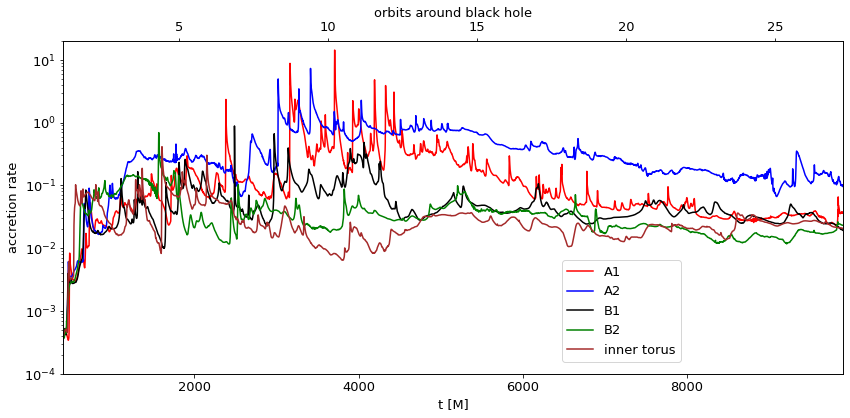

In [125]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py as hdf
import math
def load_enerX(fname,pos):
     global t,dm

     data = np.loadtxt(fname)

     t = data[:,0]
     dm = data[:,pos] # 4-old 6-new

     return()


fig, ax1 = plt.subplots(1,1)
ax1.axis([400, 9900, 1*1e-4, 20])
ax1.set_xlabel('t [M]')
ax1.set_ylabel('accretion rate')

cesta="/media/bardiev/Disk/codes/ForDiplom/AcRates/";
misto=6 # or 7 ?

load_enerX(cesta+"A1.out",misto); t1=t; dm1=dm
load_enerX(cesta+"A2.out",misto); t2=t; dm2=dm
load_enerX(cesta+"B1.out",misto); t3=t; dm3=dm
load_enerX(cesta+"B2.out",misto); t4=t; dm4=dm
load_enerX(cesta+"inner.out",misto); t5=t; dm5=dm
#load_enerX(cesta+"2000.out",misto); t6=t; dm6=dm
#load_enerX(cesta+"5000.out",misto); t7=t; dm7=dm
#load_enerX(cesta+"10k.out",misto); t8=t; dm8=dm



ax1.semilogy(t1, -dm1, 'red',    label= 'A1')
ax1.semilogy(t2, -dm2, 'blue',  label='A2')
ax1.semilogy(t3, -dm3, 'black',  label='B1')
ax1.semilogy(t4, -dm4, 'green',    label='B2')
ax1.semilogy(t5, -dm5, 'brown',    label='inner torus')
#ax1.semilogy(t6, -dm6, 'purple',    label='2000')
#ax1.semilogy(t7, -dm7, 'orange',    label='5000')
#ax1.semilogy(t8, -dm8, 'yellow',    label='10000')

ax2 = ax1.twiny()
ax2.set_xlabel('orbits around black hole')
ax1.legend(loc='upper right', bbox_to_anchor=(0.8, 0.36))
orbit=363 # Schw r=16  #orbit=234; # r=12 an spin
hodnoty = ax1.get_xlim(); rozmezi=(hodnoty[0]/orbit,hodnoty[1]/orbit);
ax2.set_xlim(rozmezi)

fig.set_size_inches(12,6)
fig.tight_layout()

fig.savefig("acrates.jpg")

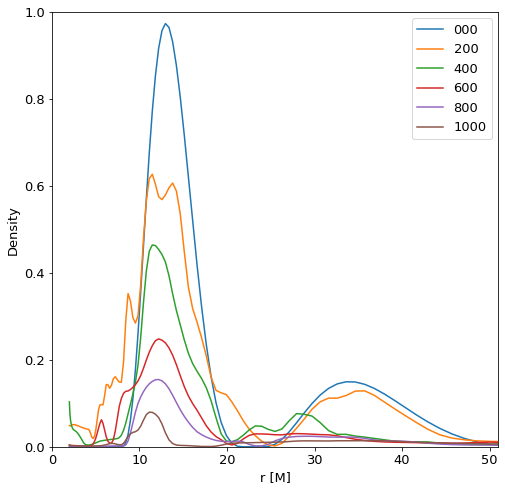

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py as hdf
import math

def load_dump(path,dumpNO): 
    global fig, Bsq, BB, B1, B2, B3, r, th, pB, pRho, bcov, bcon, Rho, b2, dx2

    f=hdf.File(path+"dump"+dumpNO+".h5","r")
    f200=hdf.File(path+"dump"+str(200)+".h5","r")
    f400=hdf.File(path+"dump"+str(400)+".h5","r")
    f600=hdf.File(path+"dump"+str(600)+".h5","r")
    f800=hdf.File(path+"dump"+str(800)+".h5","r")
    f10k=hdf.File(path+"dump"+str(1000)+".h5","r")
    f2=hdf.File(path+"coords.h5","r")

    #Datasetnames=f.keys(); print(Datasetnames)
    #Datasetnames=f2.keys(); print(Datasetnames)

    N1 = f2['N1'][()]
    N2 = f2['N2'][()]
    a  = f2['a'][()] 
    dx2 = f2['dx2'][()]
    r = f2['r'][()]
    th = f2['th'][()]
    ph = f2['ph'][()]

    Rho = f['Rho'][()]
    Rho2 = f200['Rho'][()]
    Rho4 = f400['Rho'][()]
    Rho6 = f600['Rho'][()]
    Rho8 = f800['Rho'][()]
    Rho10 = f10k['Rho'][()]
    xxx = f['DivB'][()]
    t = f['t'][()]

    bcov = f['bcov'][()]
    bcon = f['bcon'][()]

    B1B2B3gdet = f['B1B2B3gdet'][()]
    B1 = B1B2B3gdet[:,:,:,0]
    B2 = B1B2B3gdet[:,:,:,1]
    B3 = B1B2B3gdet[:,:,:,2]

    Bsq = B1*B1 + B2*B2 + B3*B3

    Th = np.pi*(th[:,:,:])
    Ph = np.pi*(ph[:,:,:])
    X = r[:,:,:]*np.sin(th[:,:,:])*np.cos(ph[:,:,:])   #radian
    Z = r[:,:,:]*np.cos(th[:,:,:])   #radian

    BB = B1B2B3gdet[:,:,:,0]
    daphi = -BB[:,:,0]*dx2
    aphi=daphi[:,::-1].cumsum(axis=1)[:,::-1]

    #  ( (np.min(B1),np.max(B1)), (np.min(BB),np.max(BB)), (np.min(Bsq),np.max(Bsq)) )

    pB = np.argmax(Bsq);

    fBsq=Bsq.flatten();

    b2=0;

    bmax=np.max(bcov[:,:,0,0]*bcon[:,:,0,0]+bcov[:,:,0,1]*bcon[:,:,0,1]+bcov[:,:,0,2]*bcon[:,:,0,2]+bcov[:,:,0,3]*bcon[:,:,0,3]);

    b2 = ( bcov[:,:,0,0]*bcon[:,:,0,0]+bcov[:,:,0,1]*bcon[:,:,0,1]+bcov[:,:,0,2]*bcon[:,:,0,2]+bcov[:,:,0,3]*bcon[:,:,0,3] );

    fb2 = b2[:,:].flatten();


    b2max = np.max(b2[:,:]);

    ptb2 = np.argmax(b2[:,:].flatten());
    ptRho = np.argmax(Rho); # Rho is already flatten
    
    #plt.figure()
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 13})
    plt.rcParams['pcolor.shading']
    plt.tight_layout()
    plt.xlabel("r [M]")
    plt.ylabel("Density")
    
    #see=50
    plt.axis([0, 51, 0, 1])
    
    plt.plot(r[:,theta,0],(Rho[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho2[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho4[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho6[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho8[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho10[:,theta,0])) 
    plt.legend(["000", "200","400","600","800","1000"])
    #plt.text(0, 30, "\n"+"t="+str(int(t)), size=15)


    #out = ( np.sqrt(b16), np.sqrt(bmax),r.flatten()[pB],th.flatten()[pB], fBsq[pB], 
    #        pB, sum(fBsq)/len(fBsq), fBsq[pRho], fBsq[8488],np.max(Bsq) );

    #out = ( np.sqrt(b2[53,64]), b2[68,64], fb2[b2p], b2p, r.flatten()[b2p],th.flatten()[b2p]);

    #print(misto);
    out1 = ( faktor * np.sqrt(b2.flatten()[ptb2]), r.flatten()[ptb2],th.flatten()[ptb2] );
    out2 = ( Rho.flatten()[ptRho], r.flatten()[ptRho],th.flatten()[ptRho] );
    rout1 = ['%.4f' % x for x in out1];
    rout2 = ['%.4f' % x for x in out2];
    #print(faktor*np.sqrt(b2[59,80]),faktor*np.sqrt(b2[68,64]),ptb2,":",rout1,ptRho,":",rout2);
    #print(faktor*np.sqrt(b2[59,80]),faktor*np.sqrt(b2[68,64]),ptb2,":",rout1,
    #  sum(np.sqrt(b2).flatten()),sum(np.sqrt(b2).flatten()), sum(b2.flatten()*Rho.flatten()) );
    #print(faktor*b2[46,64], faktor*b2[59,80], faktor*b2[68,64], (faktor*np.max(b2[:,:])), sum(b2.flatten()) );
    # r.flatten()[ptb2],th.flatten()[ptb2]
    plt.show()
    #savePic
    #plt.savefig("one/density.jpg")
    
    #fig = plt.gcf()
    #fig=plt.draw()

    #imgdata = StringIO.StringIO()
    
    return() 

faktor = 100000;
theta=60; misto="dumps/";
#P1=load_dump("/media/bardiev/Disk/codes/ForDiplom/One/beta1000/exe/"+misto,"000");
P1=load_dump("/media/bardiev/Disk/codes/ForDiplom/A/contra/exe/"+misto,"000");
#plt.savefig("one/density" ".png")

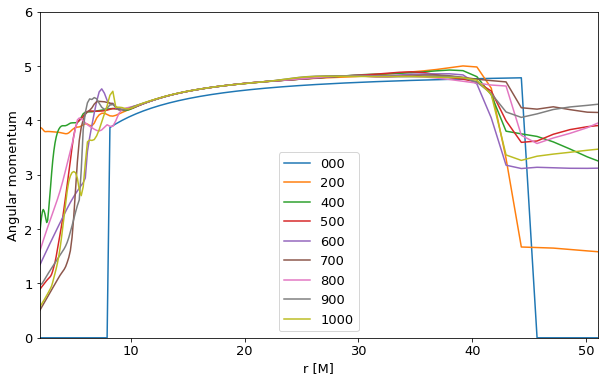

In [79]:
def load_dump(path,dumpNO): 
    global fig, Bsq, BB, B1, B2, B3, r, th, pB, pRho, bcov, bcon, Rho, b2, dx2,l

    f2=hdf.File(path+"coords.h5","r")

    #Datasetnames=f.keys(); print(Datasetnames)
    #Datasetnames=f2.keys(); print(Datasetnames)

    N1 = f2['N1'][()]
    N2 = f2['N2'][()]
    a  = f2['a'][()] 
    dx2 = f2['dx2'][()]
    r = f2['r'][()]
    th = f2['th'][()]
    ph = f2['ph'][()]
    Th = np.pi*(th[:,:,:])
    Ph = np.pi*(ph[:,:,:])
    X = r[:,:,:]*np.sin(th[:,:,:])*np.cos(ph[:,:,:])   #radian
    Z = r[:,:,:]*np.cos(th[:,:,:])   #radian
    plt.figure(figsize=(10,6))
    plt.rcParams.update({'font.size': 13})
    plt.rcParams['pcolor.shading']
    plt.tight_layout()
    plt.xlabel("r [M]")
    plt.ylabel("Angular momentum")
    

    f=hdf.File(path+"dump"+dumpNO+".h5","r")
    f200=hdf.File(path+"dump"+str(200)+".h5","r")
    f400=hdf.File(path+"dump"+str(400)+".h5","r")
    f500=hdf.File(path+"dump"+str(500)+".h5","r")
    f600=hdf.File(path+"dump"+str(600)+".h5","r")
    f700=hdf.File(path+"dump"+str(700)+".h5","r")
    f800=hdf.File(path+"dump"+str(800)+".h5","r")
    f900=hdf.File(path+"dump"+str(900)+".h5","r")
    f10k=hdf.File(path+"dump"+str(1000)+".h5","r")
    ucov = f['ucov'][()]
    l = -ucov[:,:,:,3]/(ucov[:,:,:,0])
    L = ucov[:,:,:,3]
    ucov200 = f200['ucov'][()]
    l200 = -ucov200[:,:,:,3]/(ucov200[:,:,:,0])
    ucov400 = f400['ucov'][()]
    l400 = -ucov400[:,:,:,3]/(ucov400[:,:,:,0])
    ucov500 = f500['ucov'][()]
    l500 = -ucov500[:,:,:,3]/(ucov500[:,:,:,0])
    ucov600 = f600['ucov'][()]
    l600 = -ucov600[:,:,:,3]/(ucov600[:,:,:,0])
    ucov700 = f700['ucov'][()]
    l700 = -ucov700[:,:,:,3]/(ucov700[:,:,:,0])
    ucov800 = f800['ucov'][()]
    l800 = -ucov800[:,:,:,3]/(ucov800[:,:,:,0])
    ucov900 = f900['ucov'][()]
    l900 = -ucov900[:,:,:,3]/(ucov900[:,:,:,0])
    ucov10k = f10k['ucov'][()]
    l10k = -ucov10k[:,:,:,3]/(ucov10k[:,:,:,0])
    plt.axis([2, 51, 0, 6])
    plt.plot(r[:,theta,0],(L[:,theta,0]))
    plt.plot(r[:,theta,0],(l200[:,theta,0]))
    plt.plot(r[:,theta,0],(l400[:,theta,0]))
    plt.plot(r[:,theta,0],(l500[:,theta,0]))
    plt.plot(r[:,theta,0],(l600[:,theta,0]))
    plt.plot(r[:,theta,0],(l700[:,theta,0]))
    plt.plot(r[:,theta,0],(l800[:,theta,0]))
    plt.plot(r[:,theta,0],(l900[:,theta,0]))
    plt.plot(r[:,theta,0],(l10k[:,theta,0]))
    plt.legend(["000", "200","400", "500","600","700","800","900","1000"])
    #Kerr
    r = np.arange(4,50,0.01)
    omega=(r**(3/2))/(-2 + r)
    #plt.plot(r,omega, color="black")
    #plt.axvline(x=16,c="black", linestyle='dashed')
   
    #plt.savefig("one/angularFM.jpg", bbox_inches = 'tight', pad_inches = 0.1)
    plt.show()
    return() 

faktor = 100000;
theta=60; misto="dumps/";
P1=load_dump("/media/bardiev/Disk/codes/ForDiplom/nomag/exe/"+misto,"000");
#P1=load_dump("/media/bardiev/Disk/codes/ForDiplom/One/beta1000/exe/"+misto,"000");
#print(l)

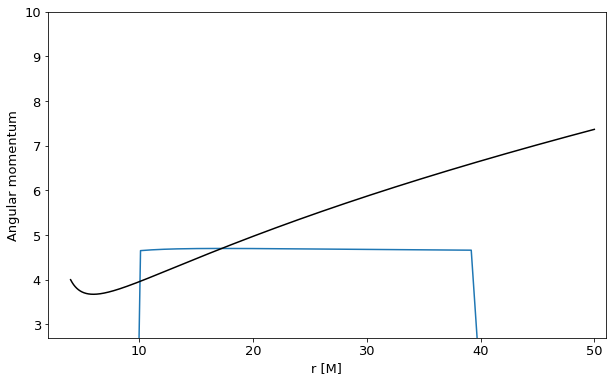

In [23]:
def load_dump(path,dumpNO): 
    global fig, Bsq, BB, B1, B2, B3, r, th, pB, pRho, bcov, bcon, Rho, b2, dx2,l

    f2=hdf.File(path+"coords.h5","r")

    #Datasetnames=f.keys(); print(Datasetnames)
    #Datasetnames=f2.keys(); print(Datasetnames)

    N1 = f2['N1'][()]
    N2 = f2['N2'][()]
    a  = f2['a'][()] 
    dx2 = f2['dx2'][()]
    r = f2['r'][()]
    th = f2['th'][()]
    ph = f2['ph'][()]
    Th = np.pi*(th[:,:,:])
    Ph = np.pi*(ph[:,:,:])
    X = r[:,:,:]*np.sin(th[:,:,:])*np.cos(ph[:,:,:])   #radian
    Z = r[:,:,:]*np.cos(th[:,:,:])   #radian
    plt.figure(figsize=(10,6))
    plt.rcParams.update({'font.size': 13})
    plt.rcParams['pcolor.shading']
    plt.tight_layout()
    plt.xlabel("r [M]")
    plt.ylabel("Angular momentum")
    

    f=hdf.File(path+"dump"+dumpNO+".h5","r")
    ucov = f['ucov'][()]
    l = -ucov[:,:,:,3]/(ucov[:,:,:,0])
    L = ucov[:,:,:,3]
    
    plt.axis([2, 51, 2.7, 10])
    #plt.plot(r[:,theta,0],(L[:,theta,0]))
    plt.plot(r[:,theta,0],(l[:,theta,0]))
    
    #Kerr
    r = np.arange(4,50,0.01)
    omega=(r**(3/2))/(-2 + r)
    m=4.923
    ls = (r*(-(r**2) + np.sqrt(4*(m**2)*(-2 + r)*r + (r**4))))/(2.*m*(-2 + r))
    #plt.plot(r,ls, color="black")
    plt.plot(r,omega, color="black")
    #plt.savefig("one/angular.jpg", bbox_inches = 'tight', pad_inches = 0.1)
    plt.show()
    return() 

faktor = 100000;
theta=60; misto="dumps/";
P1=load_dump("/media/bardiev/Disk/codes/AB/one/sss/exe/"+misto,"000");
#P1=load_dump("/media/bardiev/Disk/codes/ForDiplom/One/beta1000/exe/"+misto,"000");
#print(l)

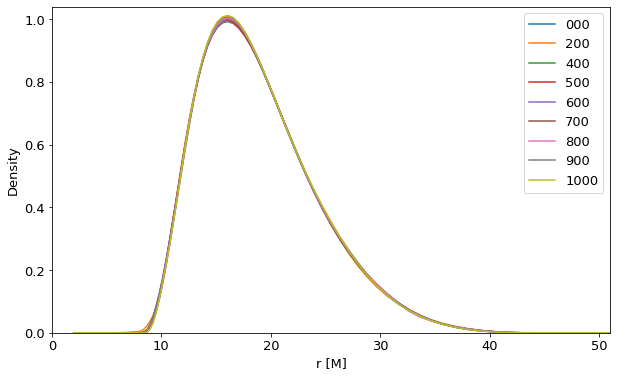

In [74]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py as hdf
import math

def load_dump(path,dumpNO): 
    global fig, Bsq, BB, B1, B2, B3, r, th, pB, pRho, bcov, bcon, Rho, b2, dx2

    f=hdf.File(path+"dump"+dumpNO+".h5","r")
    f200=hdf.File(path+"dump"+str(200)+".h5","r")
    f400=hdf.File(path+"dump"+str(400)+".h5","r")
    f500=hdf.File(path+"dump"+str(500)+".h5","r")
    f600=hdf.File(path+"dump"+str(600)+".h5","r")
    f700=hdf.File(path+"dump"+str(700)+".h5","r")
    f800=hdf.File(path+"dump"+str(800)+".h5","r")
    f900=hdf.File(path+"dump"+str(900)+".h5","r")
    f10k=hdf.File(path+"dump"+str(1000)+".h5","r")
    f2=hdf.File(path+"coords.h5","r")

    #Datasetnames=f.keys(); print(Datasetnames)
    #Datasetnames=f2.keys(); print(Datasetnames)

    N1 = f2['N1'][()]
    N2 = f2['N2'][()]
    a  = f2['a'][()] 
    dx2 = f2['dx2'][()]
    r = f2['r'][()]
    th = f2['th'][()]
    ph = f2['ph'][()]
    

    ucov = f['ucov'][()]
    l = -ucov[:,:,:,3]/(ucov[:,:,:,0])
    Rho = f['Rho'][()]
    Rho2 = f200['Rho'][()]
    Rho4 = f400['Rho'][()]
    Rho5 = f500['Rho'][()]
    Rho6 = f600['Rho'][()]
    Rho7 = f700['Rho'][()]
    Rho8 = f800['Rho'][()]
    Rho9 = f900['Rho'][()]
    Rho10 = f10k['Rho'][()]

    Th = np.pi*(th[:,:,:])
    Ph = np.pi*(ph[:,:,:])
    X = r[:,:,:]*np.sin(th[:,:,:])*np.cos(ph[:,:,:])   #radian
    Z = r[:,:,:]*np.cos(th[:,:,:])   #radian

    
    #plt.figure()
    plt.figure(figsize=(10,6))
    plt.rcParams.update({'font.size': 13})
    plt.rcParams['pcolor.shading']
    plt.tight_layout()
    plt.xlabel("r [M]")
    plt.ylabel("Density")
    
    #see=50
    plt.axis([0, 51, 0, 1.04])
    
    plt.plot(r[:,theta,0],(Rho[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho2[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho4[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho5[:,theta,0]))
    plt.plot(r[:,theta,0],(Rho6[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho7[:,theta,0]))
    plt.plot(r[:,theta,0],(Rho8[:,theta,0])) 
    plt.plot(r[:,theta,0],(Rho9[:,theta,0]))
    plt.plot(r[:,theta,0],(Rho10[:,theta,0])) 
    plt.legend(["000", "200","400", "500","600","700","800","900","1000"])


    #savePic
    plt.savefig("one/densitNOmag.jpg", bbox_inches = 'tight', pad_inches = 0.1)
    plt.show()
    

    return() 

faktor = 100000;
theta=60; misto="dumps/";
P1=load_dump("/media/bardiev/Disk/codes/ForDiplom/nomag/exe/"+misto,"000");
#plt.savefig("one/density" ".png")